# Prueba de Hipotesis

* Las Distribuciones de las Flores en cuanto al largo y ancho del sépalo... son similares?

* Hipotesis: Nula → Son realmente iguales.
* Hipotesis: Alternativa → Son en suma diferentes

In [1]:
#Importar las Librerías
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [2]:
#Leemos la base de datos a trabajar

#En una variable colocamos el url de descarga
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#Determinamos los nombres de las columnas
names = ["sepal-length","sepal-width","petal-length","petal-width","class"]
#Nuestro Dataframe se crea a partir de la lectura del URl, con los siguientes nombres.
iris = pd.read_csv(url,names = names)

In [3]:
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Primer Tipo de Prueba

* Distribución t de Student

In [4]:
se_lenght = iris.std()["sepal-length"]/np.sqrt(10)
se_width= iris.std()["sepal-width"]/np.sqrt(10)


C:\Users\User\AppData\Local\Temp\ipykernel_18740\156951220.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  se_lenght = iris.std()["sepal-length"]/np.sqrt(10)
C:\Users\User\AppData\Local\Temp\ipykernel_18740\156951220.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  se_width= iris.std()["sepal-width"]/np.sqrt(10)


In [5]:
sed = np.sqrt((se_lenght**2)+(se_width**2))

In [6]:
t_stat = (iris.mean()["sepal-length"] - iris.mean()["sepal-width"])/sed
t_stat

C:\Users\User\AppData\Local\Temp\ipykernel_18740\3362624408.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  t_stat = (iris.mean()["sepal-length"] - iris.mean()["sepal-width"])/sed


9.436693738890318

In [7]:
p = ttest_ind(iris["sepal-length"],iris["sepal-width"])
p

Ttest_indResult(statistic=36.548157693982006, pvalue=3.987838114848222e-112)

In [8]:
# La Distribución de ambas no son para nada similares.
t_stat 
p

Ttest_indResult(statistic=36.548157693982006, pvalue=3.987838114848222e-112)

* Las Distribuciones son Diferentes.
* El valor de t es en suma superior al p value.

# Correlacion y coeficiente de Pearson

In [9]:
#Valor de correlacion
iris["sepal-length"].corr(iris["sepal-width"])

-0.1093692499506493

* Nos otorga una correlación negatica muy cercana a 0, entonces la correlación es debil y hasta en cierta medida inexistente

In [10]:
#Valor del Coeficiente de Pearson
st.pearsonr(iris["sepal-length"],iris["sepal-width"])

(-0.10936924995064938, 0.1827652152713699)

* No existe realmente una correlación, están practicamente desligadas

# Análisis de la Varianza por Anova

In [11]:
#Otra forma de obtener el p valor. 
f_oneway(iris["sepal-length"],iris["sepal-width"])

F_onewayResult(statistic=1335.7678308241748, pvalue=3.9878381148486907e-112)

* Se debe comparar al nivel de significancia de 0.05, como es sumamente inferior, debemos comentar que la hipotesis nula es falsa. Las distribuciones de largo y ancho del sépalo se comportan de forma muy diferente

<AxesSubplot:ylabel='Frequency'>

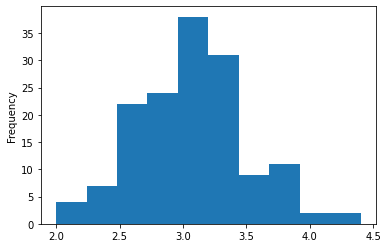

In [16]:
iris["sepal-width"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

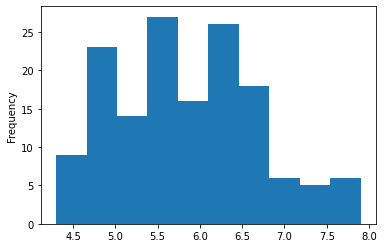

In [15]:
iris["sepal-length"].plot.hist()

* Nos sirve muchisimo para ver si dos variables están correlacionadas